# Plot das curvas ROC de cada classificador

In [1]:
# Importando os módulos necessários para o processamento dos dados
import numpy   as np
import pandas  as pd

# Módulos necessários para visualização dos dados
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importando os módulos auxiliares

from sklearn.externals import joblib # Necessário para salvar os modelos treinados em arquivos externos

# Métricas de avaliação

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plotarCurvasROC(classificadores, 
                    test_target,
                    str_balanceamento,
                    path_arquivos='./',
                    salvar_resultados=False):
    
    sns.set(style='darkgrid')
    plt.figure(figsize=(20,10))
    
    font_size = 20
    
    for chave in classificadores.keys():
        predicoes = classificadores[chave]
        if chave in ['mlp']:
            test_target.replace(-1,0,inplace=True)
        else:
            test_target.replace(0,-1,inplace=True)
            
#         print(test_target)
#         print(roc_auc_score(test_target, predicoes))
        fpr, tpr, thresholds = roc_curve(test_target, predicoes)
        plt.plot(fpr,tpr,lw=2,label=chave)
    
    plt.plot([0, 0.5, 1], [0, 0.5, 1], lw=2, ls='--', label='Aleatório')
    
    plt.xlabel('FPR', fontsize=font_size, labelpad=20)
    plt.ylabel('TPR', fontsize=font_size, labelpad=20)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.title('Curvas ROC', fontsize=font_size)
    plt.legend(loc='best', fontsize=font_size)
    
    if salvar_resultados:
        filename = 'curvas-roc-'+str_balanceamento+'.png'
        plt.savefig(path_arquivos+filename)
    
    plt.show()

In [15]:
arvore_decisao_1 = joblib.load('Classificadores/Arvores-decisao/arvore-final-abordagem-2-desbalanceado-predicoes.pkl')
arvore_decisao_2 = joblib.load('Classificadores/Arvores-decisao/arvore-final-abordagem-2-balanceado-predicoes.pkl')

print(arvore_decisao_1.size)
print(arvore_decisao_2.size)

1612
2448


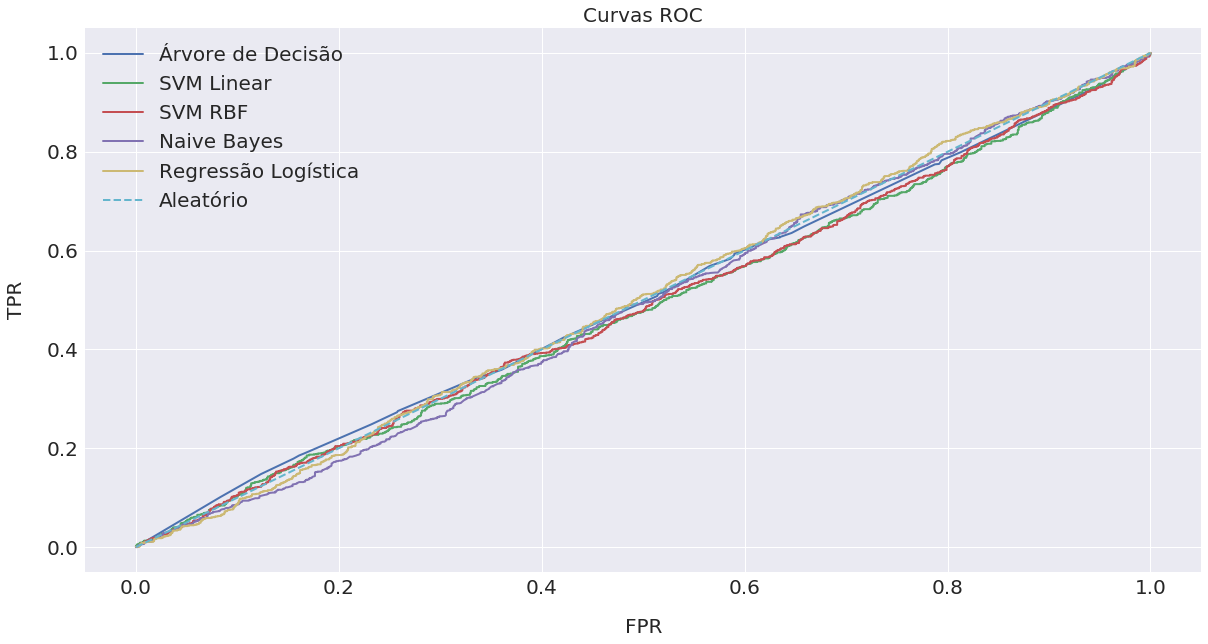

In [14]:
# Importação dos targets de teste

str_balanceamento = 'balanceado'
# path_arquivos = 'Data/datasets-'+str_balanceamento+'s/'

test_target_2 = {'desbalanceado': pd.read_csv('Data/datasets-desbalanceados/test_target_2.csv').earnings,
                 'balanceado': pd.read_csv('Data/datasets-balanceados/test_target_b_2.csv').earnings}

# Importação das predições dos classificadores

# print('Classificadores/Arvores-decisao/arvore-final-abordagem-2-'+str_balanceamento+'-predicoes.pkl')

arvore_decisao = joblib.load('Classificadores/Arvores-decisao/arvore-final-abordagem-2-'+str_balanceamento+'-predicoes.pkl')
svm_linear = joblib.load('Classificadores/SVM/svm-linear-final-abordagem-2-'+str_balanceamento+'-predicoes.pkl')
svm_rbf = joblib.load('Classificadores/SVM/svm-rbf-final-abordagem-2-'+str_balanceamento+'-predicoes.pkl')
naive_bayes = joblib.load('Classificadores/Naive-bayes/naive-bayes-final-abordagem-2-'+str_balanceamento+'-predicoes.pkl')
logit = joblib.load('Classificadores/Regressao-logistica/logit-final-abordagem-2-'+str_balanceamento+'-predicoes.pkl')

# Montando o dicionário de classificadores

classificadores = {'Árvore de Decisão': arvore_decisao,
                   'SVM Linear': svm_linear,
                   'SVM RBF': svm_rbf,
                   'Naive Bayes': naive_bayes,
                   'Regressão Logística': logit}

# Plotando as curvas ROC

plotarCurvasROC(classificadores, 
                test_target_2[str_balanceamento],
                str_balanceamento,
                salvar_resultados=False)
